<a href="https://colab.research.google.com/github/chitreshkr/AI-Workshop/blob/master/Sentence_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from IPython.display import Image

In [2]:
docs = list(pd.read_csv('yelp.csv')['text'])

# Print the first review from t
print(docs[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


# Context-free sentence similarity detection: tf-idf

tf-idf stands for: Term Frequency - Inverse Document Frequency

It is a metric to determine how similar one term is to the terms found in a specific document from the set of avaliable documents. It is calculated via the following equation:

**tfidf(t, d, D) = tf(t, d) * idf(t, D)**

where:
    
| Variable | Meaning                                                    |
| -------- | ---------------------------------------------------------- |
| t        | The term to find                                           |
| d        | The document we are referring to find the term's frequency |
| D        | Set of all documents                                       |
| tf()     | Function to calculate the term frequency                   |
| idf()    | Function to calcualte the inverse document frequency       |

## Calculating term frequency: tf(t, d)

Tem Frequency refers to how often a specific term appears in a specific document. The simpliest method is by counting the number of times the term appears in the document. Let this raw count be denoted as $f_{t,d}$. By default, `gensim.models.TfidfModel` calculates the term frequency weighting using this approach. Below is basic pseudocode to represent how $f_{t,d}$ could possibly be implemented:

```python
def raw_count(t, d):
    count = 0
    for term in d:
        if t == term:
            count += 1
    return count
````

However, the document length could have an impact on the bias. By dividing $f_{t,d}$ by the most frequent term in the document, it provides a more normalized frequency values across serveral documents. To balance small documents, we can provide an offest to account for their size. Below is one implementation of this augmented term frequency function:

$$ 0.5 + \frac{f_{t,d}}{\max\limits_{t' \in d}(f_{t',d})} $$

`gensim.models.TfidfModel` has the ability to change its term frequency weightings. See the following url for the class documentation:

> https://radimrehurek.com/gensim/models/tfidfmodel.html

## Calculating Inverse Document Frequency: idf(t, D)

Inverse Document Frequency is a huerisitc that measures how much information the term provides found in all given documents. One possible way to define inverse document frequency is the following:

$$ \log \frac{|D|}{|\{d | d \in D, t \in d \}|} $$

where $|D|$ is the number of documents and $|\{d | d \in D, t \in d\}|$ is the number of documents that the term appears in.

Examing this function, we can notice the inverse relationship between idf and the number of occurrence of the document. As there is less times the term appears, the higher the idf hueristic gets.

By default, `gensim.models.TfidfModel` uses a function similar to the one above to calculate the inverse document frequency. Just like with term frequency, the class has the ability to change its inverse document frequency weightings.  to See the following url for the class documentation:

> https://radimrehurek.com/gensim/models/tfidfmodel.html

## Cosine Similarity

To determine the similarity between two documents are similar, we can manipulate the Euclidian Dot Product Formula to generate the following equation for vectors A & B:

$$ similarity = abs(\cos^{-1}(\theta)) = abs(\frac{A \bullet B}{||A||~||B||})  $$

By examining this equation, parallel vectors would have maximum similarity and perpendicular vectors would have 0 similarity between them.

In [0]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.similarities import MatrixSimilarity

In [0]:
#Tokenize words in each document
docs_tokens = [simple_preprocess(doc) for doc in docs]

#Create a dictionary - assign indices to the words in the documents
dictionary = Dictionary(docs_tokens)

corpus = [dictionary.doc2bow(d) for d in docs_tokens]

In [0]:
tfidf = TfidfModel(corpus)

In [6]:
index = MatrixSimilarity(tfidf[corpus])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#doc_test = "The food was terrible. The service was unprofessional"
doc_test = "I loved this place. The food was great. The staff was professional"
tokens = simple_preprocess(doc_test)
bow = dictionary.doc2bow(tokens)
sims = index[tfidf[bow]]

In [9]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, s in enumerate(sims[:10]):
    print(docs[s[0]]+"\n")

We loved this place.

These guys know their stuff.  Professional staff and great location.

Loved it. Food was great, service was great. Not easy to find, but worth the search!!!

My daughter and I really love it here.  I always walk in without an appointment and I never have to wait more than a few minutes.  The staff is very friendly, talented and professional.  Highly recommended!

I loved it. The salad bar is not so great but everything else is excellent!

Loved this place!!!! Was searching for a great authentic BBQ place, and this is it!!!!!

Dr Norton and his staff are friendly and professional. They have made my 3 children feel relaxed and comfortable. I highly recommend this office.

This place is great!

very wonderful and romantic place to take your loved one :)

Sanctuary you've been replaced.  Willow Stream Spa is my new fav spa spot.  Loved. Loved. the service.
Robe got slightly damp from use, helpful attendant appears and gives me a new one.  Loved the waterfall treatment

# Context-sensitive sentence similarity detection: word2vec

2 possible methodologies to create the word representation:

- continuous skip-gram
    - Given the middle word, predict the surrounding words.
- continuous bag-of-words
    - Given the surrounding words, predict the middle word.
    
In either of the methods listed above, cosine similarity is used to measure sentence similarity.

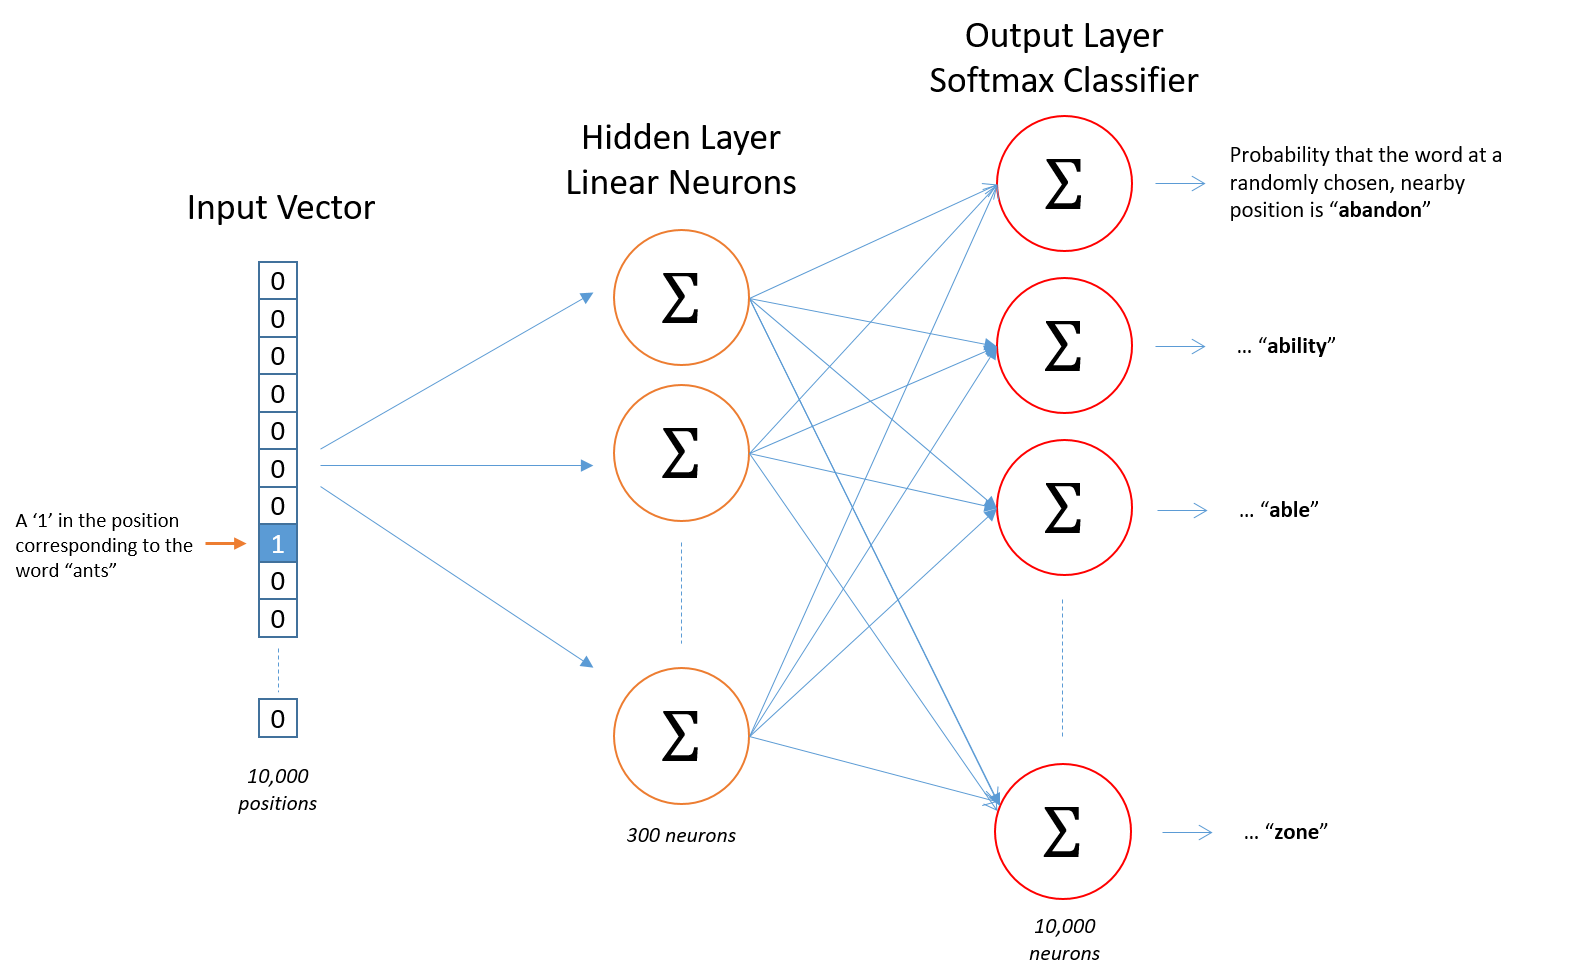

In [12]:
Image("nn_visualized.png", width = 700)

In [11]:
Image("single_word_nn.png", width = 900)

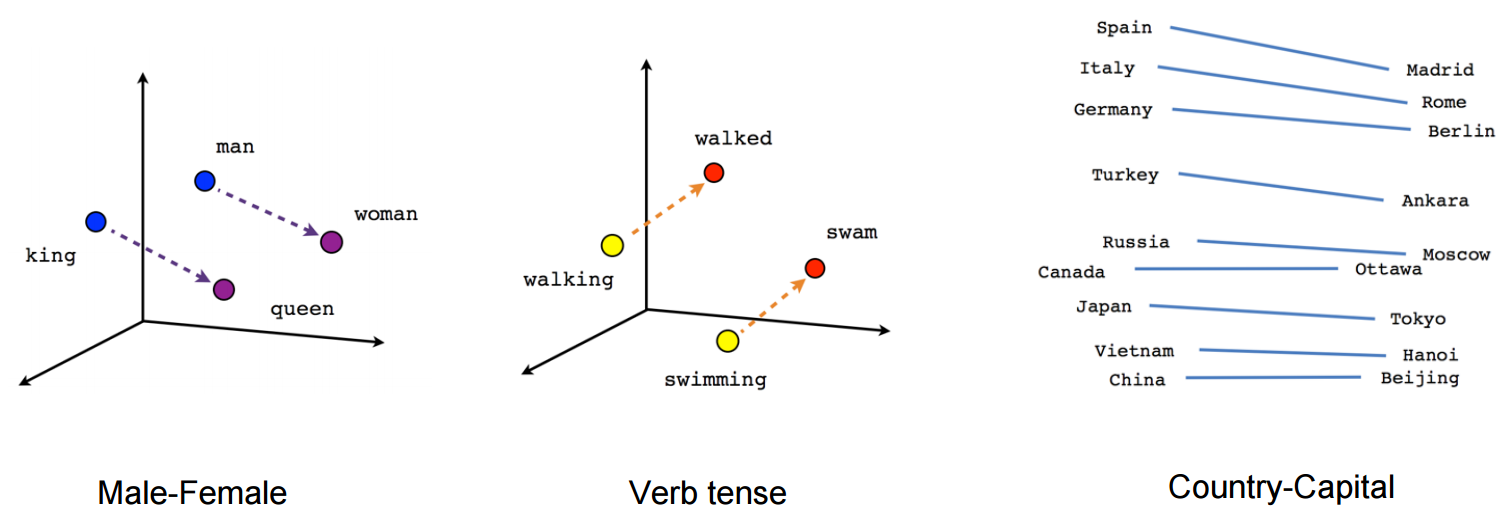

In [0]:
Image("vector_space_word_similarity.png")

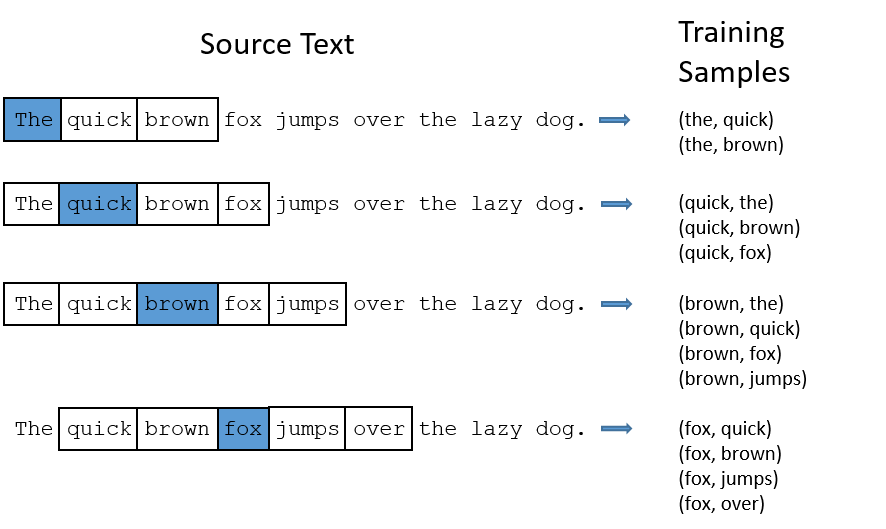

In [0]:
Image("skipgram.png")

In [0]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
model = Word2Vec(docs_tokens, min_count=1)

In [15]:
model.wv.most_similar('terrible')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('horrible', 0.9226788282394409),
 ('awful', 0.8728145360946655),
 ('poor', 0.8716661334037781),
 ('alright', 0.8633067011833191),
 ('impeccable', 0.849790096282959),
 ('spectacular', 0.8406511545181274),
 ('slow', 0.830234706401825),
 ('fine', 0.8261159658432007),
 ('considering', 0.8251431584358215),
 ('lousy', 0.8199573755264282)]

In [16]:
model.wv.most_similar('happy')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('exodus', 0.7481474280357361),
 ('unsullied', 0.7346357107162476),
 ('embarking', 0.6447330117225647),
 ('cco', 0.6398229002952576),
 ('frequency', 0.6130645275115967),
 ('whereupon', 0.611943244934082),
 ('accomodations', 0.6103893518447876),
 ('jocks', 0.606478214263916),
 ('an', 0.6027854681015015),
 ('rush', 0.5891076326370239)]

In [0]:
tagged_data = [TaggedDocument(words=d, tags=[str(i)]) for i, d in enumerate(docs_tokens)]

In [18]:
max_epochs = 10

model = Doc2Vec(vector_size=20,
                alpha=0.025,
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch + 1))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


In [19]:
test_data = simple_preprocess("I loved the food".lower())
v = model.infer_vector(test_data)

sims = model.docvecs.most_similar([v])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [20]:
for s in sims:
    print(docs[int(s[0])])

We loved this place.
I've only been here once, for breakfast, but I was very impressed and hope to make it back again soon!
Love love love this place!
Loved it. Food was great, service was great. Not easy to find, but worth the search!!!
Food was delicious, portions were great, and price was very reasonable! Highly recommend
Good food and great service.  Staff is very friendly and attentive without hovering.  I would definitely go back
I was very happy with the food and service. The service was wonderful and quick too.
Very tasty.  Had the pork which it typically dry but here it was really good.  The only thing is that I got bored with the flavor.  Quality of ingredients are very high.
Very loud, crowded and quite unpleasant. I felt very cramped and the environment was very uncomfortable.
Super cool coffee bar with a great outdoor patio for little ones to run around!


In [0]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [22]:
word_list = ['the', 'professional', 'best', 'good', 'bad', 'amazing', 'awful', 'awesome', 'food', 'service']
X = []
for w in word_list:
    sims = model.wv.most_similar(w)
    for s in sims:
        X.append(model[s[0]])
X = np.array(X)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
X_embedded = TSNE(n_components=2).fit_transform(X)

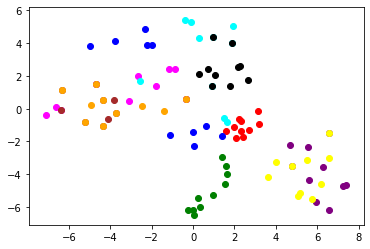

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['r', 'g', 'b', 'magenta', 'cyan', 'brown', 'black', 'orange', 'purple', 'yellow']
for i in range(10):
    pts = X_embedded[10*i:10*i+10]
    ax.scatter(pts[:,0], pts[:,1], c=colors[i], cmap='viridis')
plt.show()